In [1]:
# ************************************************************************* ----
# Params ----
# ************************************************************************* ----

library(ggplot2)

In [2]:
# ************************************************************************* ----
# Load data ----
# ************************************************************************* ----

# read data
capacity_data = read.csv(file = '../outputs/results/merged_capacity_changes.csv')

# remove EAG scenario
capacity_data = capacity_data[capacity_data$scenario != 'EAG',]

# adjust territory naming 
capacity_data[capacity_data$territory == "Gaza", "territory"] <- "GZA"
capacity_data[capacity_data$territory == "Israel", "territory"] <- "ISR"
capacity_data[capacity_data$territory == "Jordan", "territory"] <- "JOR"
capacity_data[capacity_data$territory == "West Bank", "territory"] <- "WBK"

# change to GW
capacity_data$capacity_change = capacity_data$capacity_change / 1000

# define precision
capacity_data$capacity_change = round(capacity_data$capacity_change,2)

# head
head(capacity_data, n = 5)

,node,territory,scenario,technology,capacity_change
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,gaza_battery_storage,GZA,COO,Battery,0.00
2,gaza_battery_storage,GZA,NCO,Battery,2.68
3,gaza_diesel,GZA,COO,Diesel,-0.06
4,gaza_diesel,GZA,NCO,Diesel,-0.06
5,gaza_natural_gas,GZA,COO,Gas,0.13


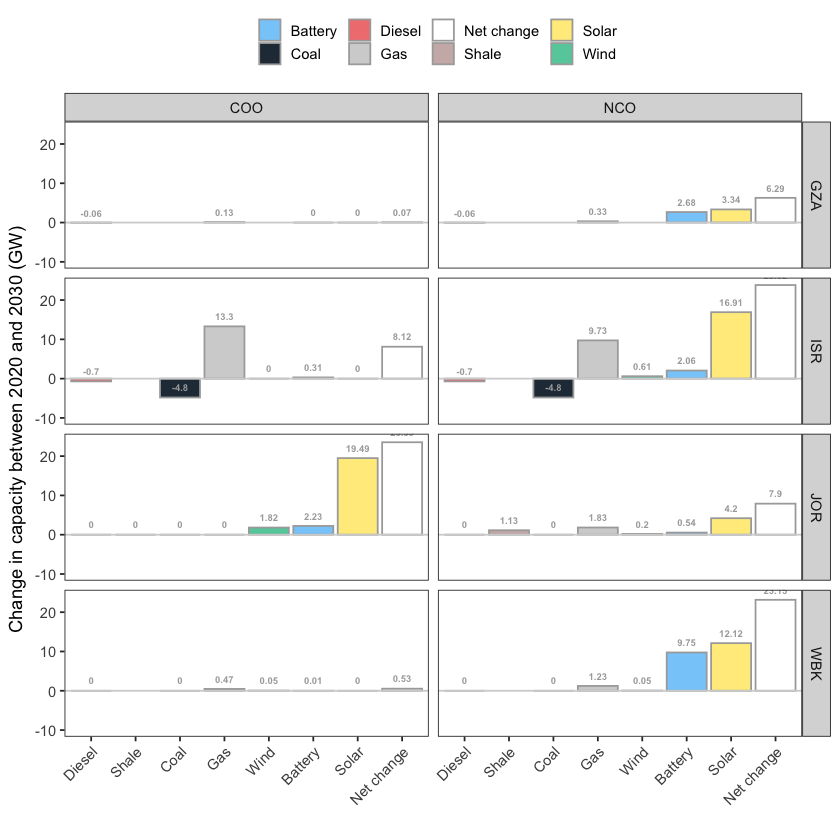

In [3]:
# ************************************************************************* ----
# GRAPH ----
# ************************************************************************* ----

ggplot(capacity_data, 
       aes(fill=technology, 
           y=capacity_change,
           x=factor(technology, level = c('Diesel',
                                          'Shale',
                                          'Coal',
                                          'Gas',
                                          'Wind',
                                          'Battery',
                                          'Solar',
                                          'Net change')),
          )
    ) + 
    geom_bar(position="dodge",
             stat="identity",
             colour="darkgray",
    ) +
    geom_text(aes(label=capacity_change), 
              vjust = -1, 
              color = "darkgray", 
              size = 2,
              fontface = "bold"
    ) +
    scale_fill_manual(values=c(# battery
                               "lightskyblue",
                               # coal
                               "#273746",
                               # diesel
                               "lightcoral",
                               # gas
                               "lightgray",
                               # net change
                               "white",
                               # shale
                               "mistyrose3", 
                               # solar
                               "lightgoldenrod1",
                               # wind 
                               "mediumaquamarine"
                               )
    ) +
    facet_grid(territory~scenario,
               # labeller = labeller(territory = ~ paste("", .),
               #                     scenario = ~ paste("", .),
               #                     #carb = ~ paste("Carb: ", .),
               #                     .multi_line = FALSE
               #                     )
    ) +
    theme_bw(
    ) + 
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.text.x =      element_text(angle = 45, vjust = 1, hjust=1),
          #axis.ticks.x =     element_blank(),
          legend.position="top",
          legend.key.size = unit(0.5, "cm"),
    ) + 
    xlab(""
    ) + 
    ylab("Change in capacity between 2020 and 2030 (GW)"
    ) +
    labs(fill=''
    ) +
    scale_y_continuous(limits = c(-10, 24)
    ) +
    geom_hline(yintercept=0, color='lightgray', size=0.5,
    )

# save figure
ggsave("../outputs/figures/oms_capacity_change.png", 
       width = 20, 
       height = 18, 
       units = "cm")